# Using the module "bsplines.py"

From the doc:

> coding: utf-8

> Copyright 2018 Yaman Güçlü

> Basic module that provides the means for evaluating the B-Splines basis
functions and their derivatives. In order to simplify automatic Fortran code
generation with Pyccel, no object-oriented features are employed.

"bsplines.py" is used to construct FE bases in STRUPHY.

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
#import scipy.sparse      as sparse
#import scipy.special     as sp

import hylife.utilitis_FEEC.bsplines as bsp

## Defining knot sequences, Greville points

If we divide the domain into `Nel` elements we have `Nel + 1` element boundaries. The knot vectors for both *periodic* and *clamped* splines contains `T.size = Nel + 1 + 2*p` entries. Here, on each side of the element boundaries vector, $p$ entries are added (see print outs below). The number `nb` of basis functions is:

* periodoc: `nb = T.size - 1 - 2*p`
* clamped: `nb = T.size - (p+1)`

Here, `p+1` is the number of elements on which a spline of degree `p` is supported.

In [2]:
Nel = 16   # number of elements
el_b = np.linspace(0., 1., Nel + 1)   # break points (element boundaries)
print(el_b, '\n')
print(el_b.shape)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ] 

(17,)


In [16]:
p = 1   # spline degree
bc = True   # periodic boundary conditions (use 'False' if clamped)
T1 = bsp.make_knots(el_b, p, bc)   # knot sequence
G1 = bsp.greville(T1, p, bc)   # Greville points

#more knot sequences and corresponding Greville points
T2 = bsp.make_knots(el_b, 2, True)  
G2 = bsp.greville(T2, 2, True)

T3 = bsp.make_knots(el_b, 3, True)
G3 = bsp.greville(T3, 3, True)

T4 = bsp.make_knots(el_b, 4, True)
G4 = bsp.greville(T4, 4, True)

T5 = bsp.make_knots(el_b, 5, True)
G5 = bsp.greville(T5, 5, True)

T1c = bsp.make_knots(el_b, 1, False) 
G1c = bsp.greville(T1c, 1, False)

T2c = bsp.make_knots(el_b, 2, False) 
G2c = bsp.greville(T2c, 2, False)

T3c = bsp.make_knots(el_b, 3, False)
G3c = bsp.greville(T3c, 3, False)

T4c = bsp.make_knots(el_b, 4, False)
G4c = bsp.greville(T4c, 4, False)

T5c = bsp.make_knots(el_b, 5, False)
G5c = bsp.greville(T5c, 5, False)

In [17]:
print(T1, '\n')
print(T1.size, '\n')
print(G1, '\n')
print(G1.size)

[-0.0625  0.      0.0625  0.125   0.1875  0.25    0.3125  0.375   0.4375
  0.5     0.5625  0.625   0.6875  0.75    0.8125  0.875   0.9375  1.
  1.0625] 

19 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375] 

16


In [18]:
print(T1c, '\n')
print(T1c.size, '\n')
print(G1c, '\n')
print(G1c.size)

[0.     0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5
 0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.    ] 

19 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.    ] 

17


In [19]:
print(T2, '\n')
print(T2.size, '\n')
print(G2, '\n')
print(G2.size)

[-0.125  -0.0625  0.      0.0625  0.125   0.1875  0.25    0.3125  0.375
  0.4375  0.5     0.5625  0.625   0.6875  0.75    0.8125  0.875   0.9375
  1.      1.0625  1.125 ] 

21 

[0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875 0.53125
 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875] 

16


In [20]:
print(T2c, '\n')
print(T2c.size, '\n')
print(G2c, '\n')
print(G2c.size)

[0.     0.     0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375
 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.
 1.    ] 

21 

[0.      0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875
 0.53125 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875 1.     ] 

18


In [21]:
print(T3, '\n')
print(T3.size, '\n')
print(G3, '\n')
print(G3.size)

[-0.1875 -0.125  -0.0625  0.      0.0625  0.125   0.1875  0.25    0.3125
  0.375   0.4375  0.5     0.5625  0.625   0.6875  0.75    0.8125  0.875
  0.9375  1.      1.0625  1.125   1.1875] 

23 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375] 

16


In [22]:
print(T3c, '\n')
print(T3c.size, '\n')
print(G3c, '\n')
print(G3c.size)

[0.     0.     0.     0.     0.0625 0.125  0.1875 0.25   0.3125 0.375
 0.4375 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.
 1.     1.     1.    ] 

23 

[0.         0.02083333 0.0625     0.125      0.1875     0.25
 0.3125     0.375      0.4375     0.5        0.5625     0.625
 0.6875     0.75       0.8125     0.875      0.9375     0.97916667
 1.        ] 

19


In [23]:
print(T4, '\n')
print(T4.size, '\n')
print(G4, '\n')
print(G4.size)

[-0.25   -0.1875 -0.125  -0.0625  0.      0.0625  0.125   0.1875  0.25
  0.3125  0.375   0.4375  0.5     0.5625  0.625   0.6875  0.75    0.8125
  0.875   0.9375  1.      1.0625  1.125   1.1875  1.25  ] 

25 

[0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875 0.53125
 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875] 

16


In [24]:
print(T4c, '\n')
print(T4c.size, '\n')
print(G4c, '\n')
print(G4c.size)

[0.     0.     0.     0.     0.     0.0625 0.125  0.1875 0.25   0.3125
 0.375  0.4375 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.9375
 1.     1.     1.     1.     1.    ] 

25 

[0.       0.015625 0.046875 0.09375  0.15625  0.21875  0.28125  0.34375
 0.40625  0.46875  0.53125  0.59375  0.65625  0.71875  0.78125  0.84375
 0.90625  0.953125 0.984375 1.      ] 

20


In [25]:
print(T5, '\n')
print(T5.size, '\n')
print(G5, '\n')
print(G5.size)

[-0.3125 -0.25   -0.1875 -0.125  -0.0625  0.      0.0625  0.125   0.1875
  0.25    0.3125  0.375   0.4375  0.5     0.5625  0.625   0.6875  0.75
  0.8125  0.875   0.9375  1.      1.0625  1.125   1.1875  1.25    1.3125] 

27 

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375] 

16


In [26]:
print(T5c, '\n')
print(T5c.size, '\n')
print(G5c, '\n')
print(G5c.size)

[0.     0.     0.     0.     0.     0.     0.0625 0.125  0.1875 0.25
 0.3125 0.375  0.4375 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875
 0.9375 1.     1.     1.     1.     1.     1.    ] 

27 

[0.     0.0125 0.0375 0.075  0.125  0.1875 0.25   0.3125 0.375  0.4375
 0.5    0.5625 0.625  0.6875 0.75   0.8125 0.875  0.925  0.9625 0.9875
 1.    ] 

21


## Finding the knot span and evalutaing b-splines

The functions `find_span` and `basis_funs` must be called only at a single point $x_0$, not an array of points. 

> For a degree $p$, the __knot span index $i$__ identifies the indices $[i-p:i]$ of all
    $p+1$ non-zero basis functions at a given location $x$.
    
 If we want to evaluate splines we must first call `find_span` and then pass the output as an argument to `basis_funs`.

In [10]:
#testing knot_span
x_arr = np.linspace(el_b[0], el_b[1], 100)
x0 = x_arr[0]

TS1 = bsp.find_span(T1, 1, x0)
TS2 = bsp.find_span(T2, 2, x0)
TS3 = bsp.find_span(T3, 3, x0)
print(np.arange(TS1-1, TS1+1))
print(np.arange(TS2-2, TS2+1))
print(np.arange(TS3-3, TS3+1))

[0 1]
[0 1 2]
[0 1 2 3]


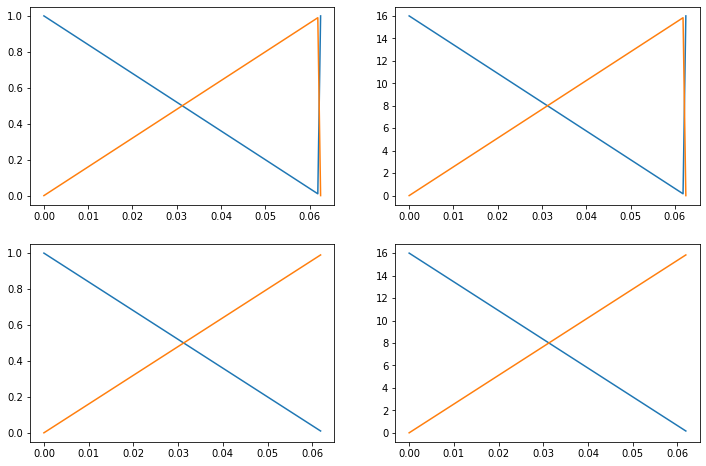

In [15]:
#spline degree p=1
val_arr   = np.zeros( (x_arr.size, 1+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS1 = bsp.find_span(T1, 1, x)
    val_arr[i, :]   = bsp.basis_funs(T1, 1, x, TS1)
    val_arr_n[i, :] = bsp.basis_funs(T1, 1, x, TS1, normalize=True)

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(x_arr, val_arr)
plt.subplot(222)
plt.plot(x_arr, val_arr_n)
plt.subplot(223)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(224)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

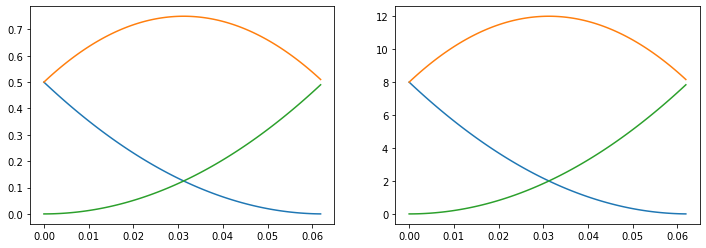

In [16]:
#spline degree p=2
val_arr = np.zeros( (x_arr.size, 2+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS2 = bsp.find_span(T2, 2, x)
    val_arr[i, :]   = bsp.basis_funs(T2, 2, x, TS2)
    val_arr_n[i, :] = bsp.basis_funs(T2, 2, x, TS2, normalize=True)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

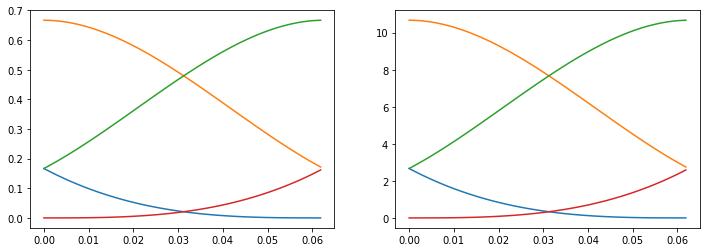

In [17]:
#spline degree p=3
val_arr = np.zeros( (x_arr.size, 3+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS3 = bsp.find_span(T3, 3, x)
    val_arr[i, :]   = bsp.basis_funs(T3, 3, x, TS3)
    val_arr_n[i, :] = bsp.basis_funs(T3, 3, x, TS3, normalize=True)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

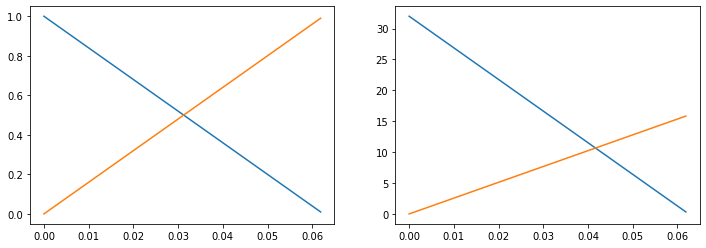

In [18]:
#spline degree p=1, clamped
val_arr   = np.zeros( (x_arr.size, 1+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS1 = bsp.find_span(T1c, 1, x)
    val_arr[i, :]   = bsp.basis_funs(T1c, 1, x, TS1)
    val_arr_n[i, :] = bsp.basis_funs(T1c, 1, x, TS1, normalize=True)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

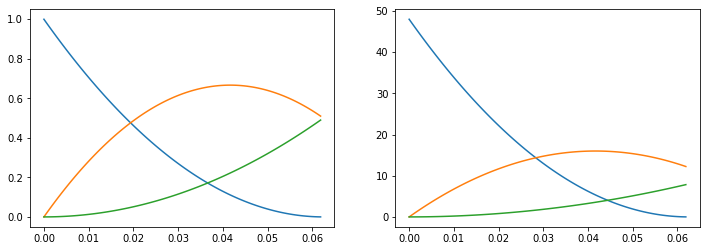

In [19]:
#spline degree p=2, clamped
val_arr = np.zeros( (x_arr.size, 2+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS2 = bsp.find_span(T2c, 2, x)
    val_arr[i, :]   = bsp.basis_funs(T2c, 2, x, TS2)
    val_arr_n[i, :] = bsp.basis_funs(T2c, 2, x, TS2, normalize=True)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])

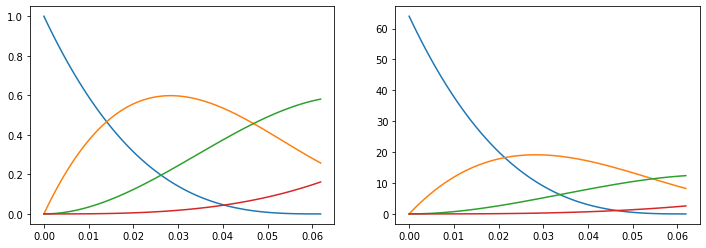

In [20]:
#spline degree p=3, clamped
val_arr = np.zeros( (x_arr.size, 3+1) )
val_arr_n = val_arr.copy()
for i,x in enumerate( x_arr ):
    #print(i, x)
    TS3 = bsp.find_span(T3c, 3, x)
    val_arr[i, :]   = bsp.basis_funs(T3c, 3, x, TS3)
    val_arr_n[i, :] = bsp.basis_funs(T3c, 3, x, TS3, normalize=True)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x_arr[:-1], val_arr[:-1, :])
plt.subplot(122)
plt.plot(x_arr[:-1], val_arr_n[:-1, :])